# EDSA Movie Recommendation Predict

© Explore Data Science Academy​ TeamCW2



<img src="img/film2.webp" style="width: 700px; height: 300px"/>

# Recommend movies to users based on content and collaboration!

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of recommending movies to users based on properties of a movies or based on rattings by other users

We're going to take the followeing approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

> Given a list of movies, can we recommend more movies to a user that will interest them?

## Data

GroupLens research group in the Department of Computer Science and Engineering at the University of Minnesota. Additional movie content data was legally scraped from IMDB 

There is also a version of it available on kaggle. https://www.kaggle.com/competitions/edsa-movie-recommendation-predict/data

## 3. Evaluation

> The evaluation metric for this competition is Root Mean Square Error. Root Mean Square Error (RMSE) is commonly used in regression analysis and forecasting, and measures the standard deviation of the residuals arising between predicted and actual observed values for a modelling process.


## 4. Supplied Files
- genome_scores.csv - a score mapping the strength between movies and tag-related properties. Read more here
- genome_tags.csv - user assigned tags for genome-related scores
- imdb_data.csv - Additional movie metadata scraped from IMDB using the - - links.csv file.
- links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
- sample_submission.csv - Sample of the submission format for the hackathon.
- tags.csv - User assigned for the movies within the dataset.
- test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
- train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.

## 5. Additional Information
- 1.**Ratings Data File Structure (train.csv)**
    - All ratings are contained in the file train.csv. Each line of this file after the header row represents one rating of one movie by one user, and has the following format: `userId,movieId,rating,timestamp` Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars). Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

- 2. **Tags Data File Structure (tags.csv)**
    - All tags are contained in the file tags.csv. Each line of this file after the header row represents one tag applied to one movie by one user, and has the following format: `userId,movieId,tag,timestamp`
    
- 3. **Movies Data File Structure (movies.csv)**
    - Movie information is contained in the file movies.csv. Each line of this file after the header row represents one movie, and has the following format: `movieId,title,genres`
    - Genres are a pipe-separated list, and are selected from the following:
    - Action
    - Adventure
    - Animation
    - Children's
    - Comedy
    - Crime
    - Documentary
    - Drama
    - Fantasy
    - Film-Noir
    - Horror
    - Musical
    - Mystery
    - Romance
    - Sci-Fi
    - Thriller
    - War
    - Western
    - (no genres listed)
    
- **Links Data File Structure (links.csv)**
    - Identifiers that can be used to link to other sources of movie data are contained in the file links.csv. Each line of this file after the header row represents one movie, and has the following format: `movieId,imdbId,tmdbId`
    
- **Tag Genome (genome-scores.csv and genome-tags.csv)**
    - The tag genome encodes how strongly movies exhibit particular properties represented by tags (atmospheric, thought-provoking, realistic, etc.). The genome is split into two files. The file genome-scores.csv contains movie-tag relevance data in the following format:`movieId,tagId,relevance`
    

<a id=""></a>
## COLLABORATORS

<img src="img/team.gif" style="width: 400px; height: 200px"/>

*Source:* https://i.pinimg.com/originals/d6/0f/63/d60f63f6dd27989ce8756c37f774d309.gif


### Team Members

OLASUNKANMI OYADOKUN - olasunkanmifelix@yahoo.com

### Please enter your names and emails here

<a href=#cont>Back to Table of Contents</a>

<a id="cont"></a>
## Table of Contents

<a href=#one>1.  IMPORTING PACKAGES </a>

<a href=#two>2.  LOADING OF THE DATA </a>

<a href=#three>3.  EDA </a>

<a href=#four>4.  FEATURE ENGINEERING </a>

<a href=#five>5.  FILTERS </a>
<li><a href=#five_one>5.1 CONTENT FILTER
 <li><a href=#five_two>5.2 COLLABORATVE FILTER
     <li><a href=#five_three>5.3 RESULTS
         <li><a href=#five_four>5.3 FILTER SUMMARY

<a href=#six>6.  MODELS </a>
  
<a href=#seven>7.  MODEL PERFORMANCE </a>

<a href=#eight>8.  MODEL EVALUATION </a>

<a href=#nine>9.  CONCLUSION </a>

<a href=#ten>10. REFRENCES </a>

<a href=#eleven>11. APPRECIATION </a>


<a id="one"></a>
## 1. IMPORTING PACKAGES

* Packages to be imported for our Predict

<a href=#cont>Back to Table of Contents</a>

In [49]:
import numpy as np
import pandas as pd
import cufflinks as cf
import re

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

In [50]:
#  Discuss the libraries that will be used throughout your analysis and modelling.


<a id="two"></a>
## 2. LOADING OF THE DATA

<img src="img/loading.gif" style="width: 400px; height: 200px"/>

Source: https://i.stack.imgur.com/hzk6C.gif

<a href=#cont>Back to Table of Contents</a>

In [51]:
# Load our Movies dataset and view first 2 rows
movies = pd.read_csv('datasets/movies.csv')
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [52]:
# Load our Tag dataset and view first 2 rows
tag = pd.read_csv('datasets/tags.csv')
tag.head(2)

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256


In [53]:
ratings = pd.read_csv('datasets/train.csv')
ratings.head(2)

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739


In [54]:
# Check out the numbers of rows and columns of each table
movies.shape, tag.shape, ratings.shape

((62423, 3), (1093360, 4), (10000038, 4))

<a id="three"></a>
## 3. EXPLORATORY DATA ANALYSIS (EDA) ON TRAIN DATASET 

<img src="img/eda3.gif" style="width: 400px; height: 200px"/>

**Source:** https://miro.medium.com/max/640/1*oe2FpBsRZj-bmhPJIuP6fw.gif

<a href=#cont>Back to Table of Contents</a>

In [55]:
# Load our Links dataset and view first 2 rows
train = pd.read_csv('datasets/train.csv')
train.head(2)

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739


In [56]:
# Check for the numbers of rows and colums in the train dataset
train.shape  

(10000038, 4)

In [57]:
# Get more informatioin of the various data types contained in the dataset
train.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [58]:
# Check for missing values in the dataset
train.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [59]:
# Check out the statistics of the dataset
train.describe()

,userId,movieId,rating,timestamp
count,1.000004e+07,1.000004e+07,1.000004e+07,1.000004e+07
mean,8.119909e+04,2.138911e+04,3.533395e+00,1.215677e+09
std,4.679359e+04,3.919578e+04,1.061124e+00,2.268921e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.051000e+04,1.197000e+03,3.000000e+00,1.011742e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.199019e+09
75%,1.215790e+05,8.630000e+03,4.000000e+00,1.447242e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


In [60]:
train.skew() # Check the nature of skewness in the data

userId       0.007477
movieId      2.200436
rating      -0.703118
timestamp   -0.017331
dtype: float64

In [61]:
train.kurtosis() 

userId      -1.197634
movieId      4.351014
rating       0.221102
timestamp   -1.316891
dtype: float64

##### Observation from stats
- The data set has `10000038` rows and `4`columns
- The table have all **numeric datatype** namely:
- There are no missing values in the data set
- The sumarry breakdown of statistical description is shown in the table above
- The `sentiment` and `tweetid` are **moderately negatively skew** while `message` cannot be determine now because it is non numeric datatype
- The kurtosis indicates lack of outliers in the dataset since it is **< 3**
    

In [62]:
train.rating.value_counts()

4.0    2652977
3.0    1959759
5.0    1445230
3.5    1270642
4.5     880516
2.0     656821
2.5     505578
1.0     311213
1.5     159731
0.5     157571
Name: rating, dtype: int64

In [63]:
# # Lets pot a bar chart of unique ratings
# train["rating"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [64]:
#Check statistics of the various sentiments
train.groupby('rating').describe() 

userId                                                      \
            count          mean           std  min       25%      50%   
rating                                                                  
0.5      157571.0  80494.391481  46122.209914  2.0  41404.00  80328.0   
1.0      311213.0  80914.237037  46772.252582  1.0  39920.00  80501.0   
1.5      159731.0  80847.786910  46944.418891  2.0  39654.00  80511.0   
2.0      656821.0  81360.850541  46908.620509  2.0  40313.00  81028.0   
2.5      505578.0  80813.491950  46720.115842  1.0  39896.00  80018.0   
3.0     1959759.0  81303.320856  46801.843580  1.0  40611.50  80902.0   
3.5     1270642.0  80929.655872  46694.426415  1.0  40036.00  80597.0   
4.0     2652977.0  81266.452488  46794.761580  1.0  40696.00  81017.0   
4.5      880516.0  81317.112657  46864.379190  1.0  40423.75  81216.0   
5.0     1445230.0  81337.436560  46855.348785  1.0  40833.00  81096.5   

                               movieId                ...                     \
              75%       max      count          mean  ...      75%       max   
rating                                                ...                      
0.5     120065.00  162541.0   157571.0  32311.882117  ...  55442.0  208385.0   
1.0     121324.00  162541.0   311213.0  15985.636815  ...   5378.0  209145.0   
1.5     121857.00  162541.0   159731.0  28104.281987  ...  47122.0  208319.0   
2.0     122011.00  162541.0   656821.0  17076.679908  ...   5943.0  208943.0   
2.5     121089.00  162541.0   505578.0  29513.890790  ...  50923.0  209153.0   
3.0     121747.00  162541.0  1959759.0  17112.912121  ...   5883.0  209171.0   
3.5     121147.00  162541.0  1270642.0  30262.105946  ...  52722.0  209135.0   
4.0     121556.00  162541.0  2652977.0  19118.387946  ...   7099.0  209123.0   
4.5     121773.00  162541.0   880516.0  28310.653057  ...  48780.0  209129.0   
5.0     121730.75  162541.0  1445230.0  17686.071820  ...   5971.0  208939.0   

        timestamp                                                          \
            count          mean           std           min           25%   
rating                                                                      
0.5      157571.0  1.338828e+09  1.638090e+08  1.045607e+09  1.176875e+09   
1.0      311213.0  1.143397e+09  2.288222e+08  8.228736e+08  9.612011e+08   
1.5      159731.0  1.312999e+09  1.662392e+08  1.045607e+09  1.150191e+09   
2.0      656821.0  1.161556e+09  2.236559e+08  8.231852e+08  9.746843e+08   
2.5      505578.0  1.315135e+09  1.653999e+08  1.045607e+09  1.153787e+09   
3.0     1959759.0  1.146125e+09  2.370826e+08  8.228736e+08  9.505908e+08   
3.5     1270642.0  1.321483e+09  1.636591e+08  1.045607e+09  1.164998e+09   
4.0     2652977.0  1.188330e+09  2.295280e+08  8.228736e+08  9.768274e+08   
4.5      880516.0  1.324444e+09  1.614744e+08  1.045607e+09  1.171581e+09   
5.0     1445230.0  1.182089e+09  2.440449e+08  7.896520e+08  9.627950e+08   

                                                  
                 50%           75%           max  
rating                                            
0.5     1.396229e+09  1.481438e+09  1.574312e+09  
1.0     1.059928e+09  1.365811e+09  1.574313e+09  
1.5     1.297903e+09  1.471143e+09  1.574314e+09  
2.0     1.108563e+09  1.385333e+09  1.574328e+09  
2.5     1.304208e+09  1.471729e+09  1.574314e+09  
3.0     1.098689e+09  1.378497e+09  1.574327e+09  
3.5     1.320514e+09  1.474143e+09  1.574327e+09  
4.0     1.152661e+09  1.434976e+09  1.574328e+09  
4.5     1.330706e+09  1.473088e+09  1.574327e+09  
5.0     1.132105e+09  1.446700e+09  1.574326e+09  

[10 rows x 24 columns]

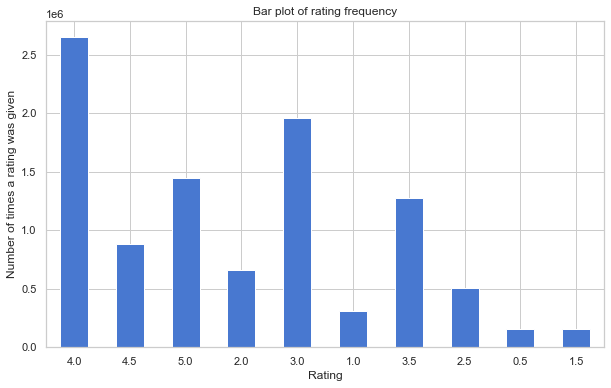

In [65]:
train['rating'].value_counts(sort=False).plot(kind='bar' ,figsize=(10,6), use_index = True, rot=0)
plt.title('Bar plot of rating frequency')
plt.xlabel('Rating')
plt.ylabel('Number of times a rating was given')
label = list(train['rating'].value_counts(sort=False))


In [66]:
#pip install bar_chart_race

In [67]:
# Create a mixed datafram of movies title, genres and all user ratings given to each movie
movies_ratings = pd.merge(movies, train, on='movieId', how='left')

In [68]:
movies_ratings.head(2)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,158849.0,5.0,994716786.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,97203.0,5.0,942683155.0


In [69]:
avg_highly_rated_movies = movies_ratings.groupby(['title']).agg({"rating":"mean"})['rating'].sort_values(ascending=False)
avg_highly_rated_movies = avg_highly_rated_movies.to_frame()
avg_highly_rated_movies

,rating
title,
Which Way Home (2009),5.0
Kaakha Kaakha (2003),5.0
Not Quite Human II (1989),5.0
Selling Isobel (2018),5.0
Sehar (2005),5.0
...,...
Терем-теремок (1971),NaN
"Ужас, который всегда с тобой (2007)",NaN
काशी - In Search of Ganga (2018),NaN


In [70]:
popular_movies = movies_ratings.groupby(['title']).agg({"rating":"sum"})['rating'].sort_values(ascending=False)
popular_movies = popular_movies.to_frame()

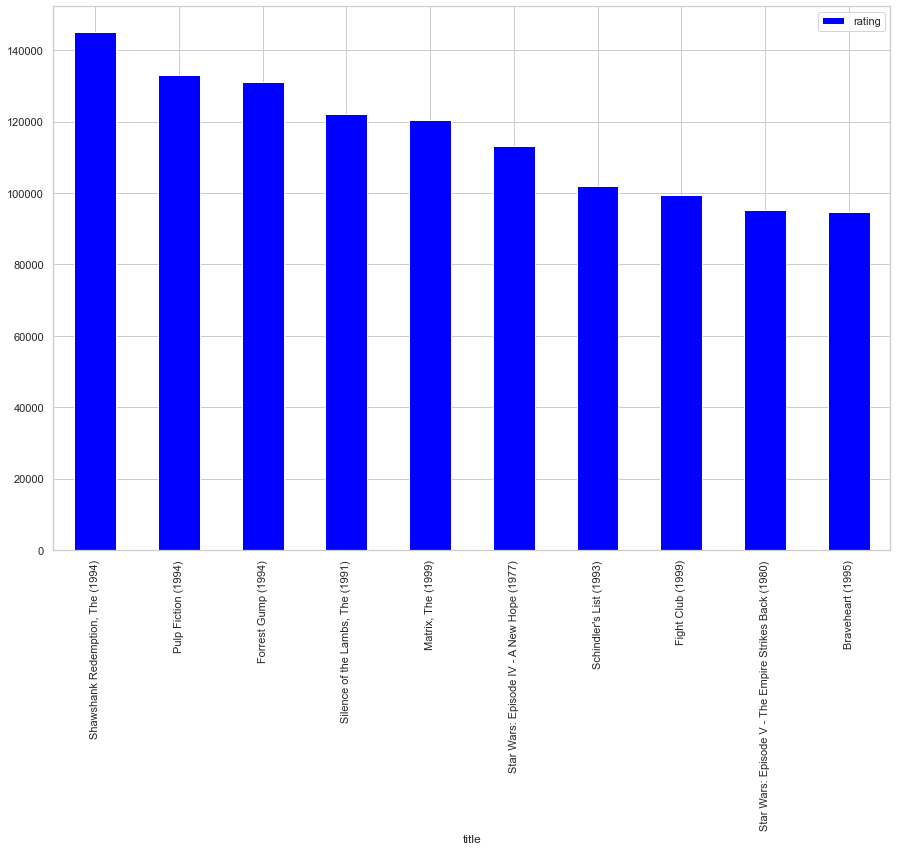

In [71]:
popular_movies.head(10).plot(kind="bar", color=["blue"]);

In [72]:
popular_movies.reset_index(level=0, inplace=True)

In [73]:
popular_movies.columns = ['title', 'Number of Users watched']

In [74]:
popular_movies[popular_movies['Number of Users watched'] >= 400]

,title,Number of Users watched
0,"Shawshank Redemption, The (1994)",145035.0
1,Pulp Fiction (1994),132972.0
2,Forrest Gump (1994),131061.0
3,"Silence of the Lambs, The (1991)",122021.0
4,"Matrix, The (1999)",120531.5
...,...,...
6678,21 and Over (2013),400.5
6679,Staying Alive (1983),400.5
6680,"Iceman, The (2012)",400.5
6681,Anatomy (Anatomie) (2000),400.0


**Note:** For a new user registered to our system, these can be good movies to recommend to them

In [75]:
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [76]:
movie_genre = movies.genres
movie_genre

0        Adventure|Animation|Children|Comedy|Fantasy
1                         Adventure|Children|Fantasy
2                                     Comedy|Romance
3                               Comedy|Drama|Romance
4                                             Comedy
                            ...                     
62418                                          Drama
62419                                    Documentary
62420                                   Comedy|Drama
62421                             (no genres listed)
62422                         Action|Adventure|Drama
Name: genres, Length: 62423, dtype: object

<a id='four'></a>
## FEATURE ENGINEERING

<img src="img/feature_Engineering.gif" style="width: 400px; height: 200px"/>

**Source:**https://miro.medium.com/max/720/1*7w7c8yS70eHR74qgBJJu8Q.gif

<a href=#cont>Back to Table of Contents</a>

In [78]:
movies.head(1)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [79]:
# Remove the vertical lines that separates the genres in the genre's column
movies['genres'] = movies['genres'].str.replace('|','')

In [80]:
#check to confirm change
movies.head(1)

,movieId,title,genres
0,1,Toy Story (1995),AdventureAnimationChildrenComedyFantasy


In [81]:
movies['genres'].loc[0]

'AdventureAnimationChildrenComedyFantasy'

In [82]:
# compare length of unique movieId of ratings and movie table 
len(movies.movieId.unique()), len(ratings.movieId.unique())

(62423, 48213)

In [83]:
#check the difference in uniqueness in movieId between the two tables
len(movies.movieId.unique()) - len(ratings.movieId.unique())

14210

Since we are working with a very larg datasets, we will limit our ratings to users whose ratings are equal to ot more than 55 movies otherwise we will not ne able to create a DataFrame for pivot table which is essential for collaborative filtering 

In [84]:
#ratings.groupby('movieId').count()

In [85]:
# movieId = ratings.groupby(['movieId']).agg({"rating":"sum"})['rating'].sort_values(ascending=True)
# movieId

In [86]:
ratings.groupby('movieId').count()

,userId,rating,timestamp
movieId,,,
1,23062,23062,23062
2,9654,9654,9654
3,4727,4727,4727
4,968,968,968
5,4648,4648,4648
...,...,...,...
209145,1,1,1
209153,1,1,1
209159,1,1,1


In [87]:
# Maintain ratings that >= 255 movies
ratings_f = ratings.groupby('userId').filter(lambda x: len(x) >= 250)

# Check out movie titles that makes the list of 55 or more ratings
movie_list_rating = ratings_f.movieId.unique().tolist()

**Note:** To avoid problems with insufficient memory allocation for collaborative filtering, we shall e filtering off any movies with ratings less than 250, although this will lead to filtering off lots of movies, but it will afford us more processing time and usability of our hardware systems.

In [88]:
# Chech out new lenth and compare with all movies
len(ratings_f), len(ratings)

(2896175, 10000038)

In [89]:
# Compute number of movis removed
removed_movies = len(ratings) - len(ratings_f)
removed_movies

7103863

`7103863` movies did not make the list

In [90]:
# Compute percentage of movies remaining
len(ratings_f.movieId.unique())/len(ratings.movieId.unique()) * 100

94.48903822620454

Approximately 99% of our data are left

In [91]:
# Percentage of users left
len(ratings_f.userId.unique())/len(ratings.movieId.unique()) * 100

13.707921100118226

We still have almost 100% of our users intact

In [92]:
# filter the movie data frame
movies = movies[movies.movieId.isin(movie_list_rating)]

In [93]:
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),AdventureAnimationChildrenComedyFantasy
1,2,Jumanji (1995),AdventureChildrenFantasy


In [94]:
# Map movie to id:
Mapping_file = dict(zip(movies.title.tolist(), movies.movieId.tolist()))

In [95]:
Mapping_file

{'Toy Story (1995)': 1,
 'Jumanji (1995)': 2,
 'Grumpier Old Men (1995)': 3,
 'Waiting to Exhale (1995)': 4,
 'Father of the Bride Part II (1995)': 5,
 'Heat (1995)': 6,
 'Sabrina (1995)': 7,
 'Tom and Huck (1995)': 8,
 'Sudden Death (1995)': 9,
 'GoldenEye (1995)': 10,
 'American President, The (1995)': 11,
 'Dracula: Dead and Loving It (1995)': 12,
 'Balto (1995)': 13,
 'Nixon (1995)': 14,
 'Cutthroat Island (1995)': 15,
 'Casino (1995)': 16,
 'Sense and Sensibility (1995)': 17,
 'Four Rooms (1995)': 18,
 'Ace Ventura: When Nature Calls (1995)': 19,
 'Money Train (1995)': 20,
 'Get Shorty (1995)': 21,
 'Copycat (1995)': 22,
 'Assassins (1995)': 23,
 'Powder (1995)': 24,
 'Leaving Las Vegas (1995)': 25,
 'Othello (1995)': 26,
 'Now and Then (1995)': 27,
 'Persuasion (1995)': 28,
 'City of Lost Children, The (Cité des enfants perdus, La) (1995)': 29,
 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)': 30,
 'Dangerous Minds (1995)': 31,
 'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)':

In [96]:
# Drop unwanted colums
tag.drop(['timestamp'],1, inplace=True)
ratings_f.drop(['timestamp'],1, inplace=True)

#### Merge the movies and the tag data frame and create a metadata tag for

- we do this to give users better content based recommendations

In [97]:
# Create a mixed datafram of movies title, genres and all user tags given to each movie
mixed = pd.merge(movies, tag, on='movieId', how='left')
mixed.head(2)

,movieId,title,genres,userId,tag
0,1,Toy Story (1995),AdventureAnimationChildrenComedyFantasy,791.0,Owned
1,1,Toy Story (1995),AdventureAnimationChildrenComedyFantasy,1048.0,imdb top 250


In [98]:
# Create metadata from tags genres
mixed.fillna('', inplace=True)
mixed = pd.DataFrame(mixed.groupby('movieId')['tag'].apply(
lambda x: "%s" % ' '.join(x)))

Final = pd.merge(movies, mixed, on='movieId', how='left')
Final['metadata'] = Final[['tag', 'genres']].apply(
lambda x: ' '.join(x), axis=1)

Final[['movieId','title','metadata']].head(3)

,movieId,title,metadata
0,1,Toy Story (1995),Owned imdb top 250 Pixar Pixar time travel chi...
1,2,Jumanji (1995),Robin Williams time travel fantasy based on ch...
2,3,Grumpier Old Men (1995),funny best friend duringcreditsstinger fishing...


In [99]:
Final.shape

(45556, 5)

<a id="five"></a>
## 5 FILTERS

One of the ideas of content filtering is to handle `cold  cold start problems` this is important when a user is new to a system or when an movie has not been viewed or clicked by any one

#### tf-idf vectors and truncated SVD:

<a href=#cont>Back to Table of Contents</a>

<a id="five_one"></a>
## 5.1 Creating a Content latent matrix:

<a href=#cont>Back to Table of Contents</a>

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(Final['metadata'])
# tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=Final.index.tolist())
# print(tfidf_df.shape)

In [101]:
tfidf_matrix.shape

(45556, 36081)

As observed, the dimension of the sparse matrix iis too large, hence we reduce its dimension using the SVD matrix

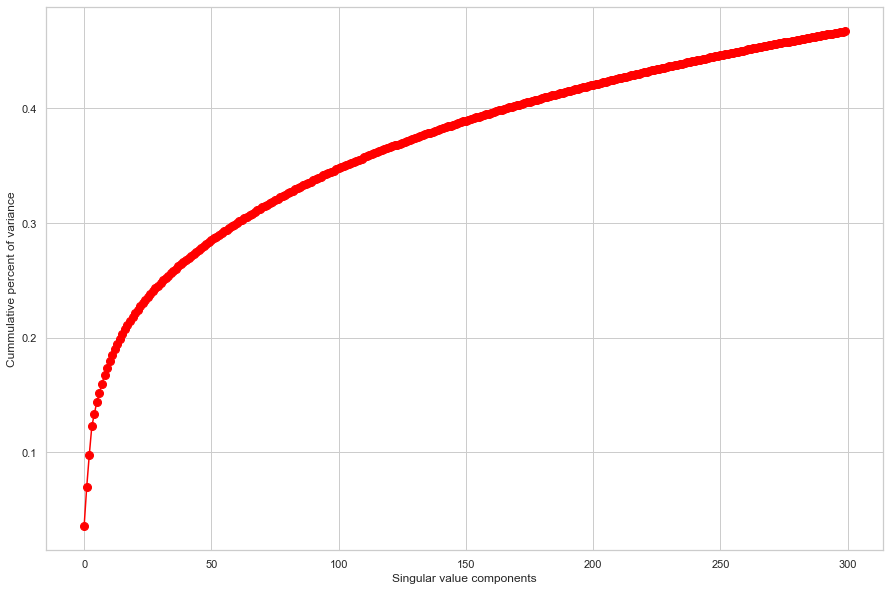

CPU times: total: 29.6 s
Wall time: 26.9 s


In [102]:
%%time
#Since the data is too lager to be computed by my computer, we reduce its dimension using SVD
from sklearn.decomposition import TruncatedSVD
svd  = TruncatedSVD(n_components=300)
latent_matrix = svd.fit_transform(tfidf_matrix)
latent_matrix_1_df = pd.DataFrame(latent_matrix,index=Final.title.tolist())

# plot variance to see what latent dimension to use
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms=16, color='red')
plt.xlabel('Singular value components', fontsize=12)
plt.ylabel('Cummulative percent of variance', fontsize=12)
plt.show()

the graph above means for a chosen latent feature of 300, about 45% variance is explained by these features 

**Note:** 200 was chosen to help manage the limited computer resources available for this work

In [103]:
latent_matrix_1_df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
Toy Story (1995),0.002794,0.004639,0.057317,0.000095,0.014848,-0.003385,0.041927,0.02021,0.445994,-0.036169,...,0.063315,0.026918,-0.008959,0.009954,0.062953,0.026361,-0.072545,-0.154775,-0.010741,-0.027472


In [104]:
latent_matrix_1_df.shape

(45556, 300)

<a id='five_two'></a>
## 5.2 Creating a Collaborative latent matrix for ratings:

<a href=#cont>Back to Table of Contents</a>

In [105]:
ratings_f.head()

,userId,movieId,rating
3,106362,32296,2.0
9,144018,1997,5.0
10,40858,5025,3.5
11,80119,92259,3.5
12,6063,33493,3.0


In [106]:
ratings_f1 = pd.merge(movies[['movieId']], ratings_f, on='movieId',how='right')

In [107]:
ratings_f1.shape

(2896175, 3)

In [108]:
ratings_f1.head(1)

,movieId,userId,rating
0,32296,106362,2.0


In [80]:
ratings_f2 = ratings_f1.pivot(index='movieId', columns='userId', values='rating').fillna(0)

In [85]:
ratings_f2.shape

(45556, 6609)

The dimension of the matrix is still too large, hence we will apply `dimension reduction technique as was done with the content based filtering`  

In [87]:
len(ratings_f.movieId.unique())

45556

In [98]:
%%time
# Dimension reduction using svd
svd = TruncatedSVD(n_components=300)
latent_matrix_2 = svd.fit_transform(ratings_f2)
latent_matrix_2_df = pd.DataFrame(latent_matrix_2,index=Final.title.tolist())

CPU times: total: 2min 47s
Wall time: 1min 35s


In [100]:
latent_matrix_2_df.shape

(45556, 300)

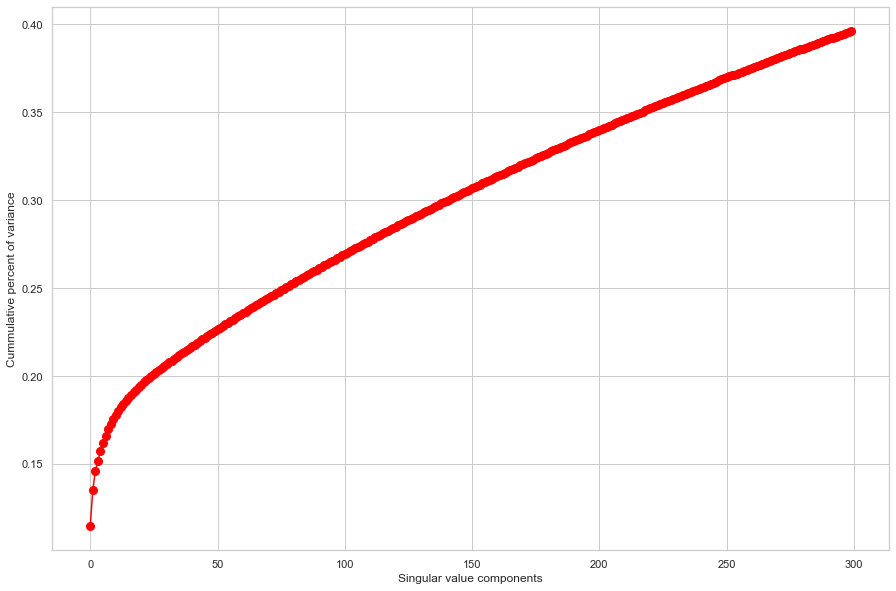

In [101]:
# plot variance explained to see what latent dimensions to use
explained = svd.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms=16, color='red')
plt.xlabel('Singular value components', fontsize=12)
plt.ylabel('Cummulative percent of variance', fontsize=12)
plt.show()

the graph above means for a chosen latent feature of 300, about 40% variance is explained by these features 

**Note:** 200 was chosen to help manage the limited computer resources available for this work

<a id="five_three"><a/>
    
## 5.3 RESULTS: Comparing Content Vs Collaborative Vd Hybrid Using Cosine Similarity

<a href=#cont>Back to Table of Contents</a>

In [112]:
from sklearn.metrics.pairwise import cosine_similarity

# take the latent vectors for a selected movie from both content and collaboorative matrixes
a_1 = np.array(latent_matrix_1_df.loc['Toy Story (1995)']).reshape(1, -1)
a_2 = np.array(latent_matrix_2_df.loc['Toy Story (1995)']).reshape(1, -1)

# Calculate thesimilarity of the movies with others in the list
score_1 = cosine_similarity(latent_matrix_1_df, a_1).reshape(-1)
score_2 = cosine_similarity(latent_matrix_2_df, a_2).reshape(-1)

# an average measure of both content and collaboratice
hybrid = ((score_1 + score_2) /2.0)

# form a data frame of similar movies
dictDf = {'content': score_1, 'collaborative': score_2, 'hybrid': hybrid}
similar = pd.DataFrame(dictDf, index=latent_matrix_1_df.index)

# Sort the vrious metrics used
similar.sort_values('collaborative', ascending=False, inplace=True)

similar[1:].head(11)

,content,collaborative,hybrid
Batman & Robin (1997),0.068995,0.475286,0.272140
Air Force One (1997),0.006645,0.474860,0.240752
Wild Wild West (1999),0.037875,0.473033,0.255454
Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (2002),0.099536,0.470773,0.285154
How the Grinch Stole Christmas (a.k.a. The Grinch) (2000),0.057504,0.468824,0.263164
Charlie's Angels (2000),0.074477,0.468776,0.271627
Space Jam (1996),0.172983,0.466056,0.319519
Judge Dredd (1995),-0.015054,0.464973,0.224960
"Hunchback of Notre Dame, The (1996)",0.441520,0.464805,0.453163
Waterworld (1995),0.034451,0.462629,0.248540


<a id="five_four"><a/>
## 5.4 SUMMARY

- The Content based scored better than the collaborative because aside filtering off movies with ratings above 250, we also had about 40% variance of our data explained by a latent feature of 300, while about 50% was explained by 300 features for our content based

<a href=#cont>Back to Table of Contents</a>

<a id="six"></a>
## 6. MODELS

<img src="img/machine-learning-libraries.gif" style="width: 400px; height: 200px"/>

**Source:** https://liwaiwai.com/wp-content/uploads/2021/03/machine-learning-libraries.gif

<a href=#cont>Back to Table of Contents</a>

<a id="seven"></a>
## 7. MODEL EVALUATION

<img src="img/performance.gif" style="width: 400px; height: 200px"/>

**Source:** https://i.pinimg.com/originals/04/8a/51/048a51831e45b04321af593612a04a16.gif

<a href=#cont>Back to Table of Contents</a>

<a id="eight"></a>
## 8. MODEL PERFORMANCE

<img src="img/performance.gif" style="width: 400px; height: 200px"/>

**Sorce:** https://miro.medium.com/max/1400/1*f-k9vMJGKqctXjvO8dM-UQ.gif
<a href=#cont>Back to Table of Contents</a>

<a id="nine"></a>
## 9. CONCLUSION 

<img src="img/conclusion.gif" style="width: 400px; height: 200px"/>

**Source:**https://miro.medium.com/max/1400/1*f-k9vMJGKqctXjvO8dM-UQ.gif

<a href=#cont>Back to Table of Contents</a>

In [48]:
#write conclusions

<a id="ten"></a>
## 10. REFERENCES 

<img src="img/conclusion.gif" style="width: 400px; height: 200px"/>

**Source:** https://thumbs.gfycat.com/DirtyFabulousFlatfish-max-1mb.gif

<a href=#cont>Back to Table of Contents</a>

In [115]:
#Our references are:

<a id="eleven"></a>

<img src="img/thank_you.gif" style="width: 400px; height: 200px"/>

**Source:** https://media.tenor.com/Q-ZluNT3M0sAAAAM/thank-you-thanking-you.gif


<a href=#cont>Back to Table of Contents</a>